In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import glob

In [2]:
def get_stokes_i(fitsname):
    hdu = fits.open(fitsname)
    return hdu[0].data[0,0,:,:]

#plot a whole list of data files
def plot_all(fits_names, rows=1, combine=lambda d : d[0], lim=None, titles=None, 
             display_mean=False):
    
    #turns fits_names into a 2D-list
    if not isinstance(fits_names, list):
        fits_names = [fits_names]
    if not isinstance(fits_names[0], list):
        fits_names = [fits_names]
    
    if lim == None or len(lim) < 2:
        lim = [None,None]
    
    if titles == None:
        titles = fits_names[0]
    
    cols = int(np.ceil(len(fits_names[0]) / rows))
    
    fig, axes = plt.subplots(figsize=(24,24),nrows=rows, ncols=cols, sharex=True,sharey=False)
    plt.rcParams.update({'font.size': 18})

    #make axes 2D
    if rows == 1:
        axes = [axes]
    if cols == 1:
        axes = [[x] for x in axes]

    for i in range(rows):
        for j in range(cols):  
            if cols * i + j >= len(fits_names[0]):
                break
            
            images = [get_stokes_i(fits_list[cols * i + j]) for fits_list in fits_names]
            data = combine(images)
            if display_mean:
                disp = round(np.mean(data), 3)
            else:
                disp = round(np.std(data), 3)
            
            im = axes[i][j].imshow(data,label=disp,vmin=lim[0],vmax=lim[1])
            axes[i][j].set_title('{}'.format(titles[cols * i + j]))
            #axes[i][j].set_xlabel('RA')
            #axes[i][j].set_ylabel('DEC')
            fig.colorbar(im,ax=axes[i][j],use_gridspec=True,fraction=0.046,pad=0.04)
            axes[i][j].text(400, 470, disp, bbox={'facecolor': 'white', 'pad': 10})
    
    return fig, axes

In [3]:
path = "../mask_and_none_flags/"
no_deconvolution = glob.glob(path+"no_deconvolution.fits")
plot_all(fits_names=[no_deconvolution * 2])

(<Figure size 1728x1728 with 0 Axes>, [array([], dtype=object)])

<Figure size 1728x1728 with 0 Axes>

In [4]:
pstring = lambda s : s.split('_')[0] + s.split('_')[2] + s

residual = sorted(glob.glob(path + "*final.residual.fits"), key=pstring)
model = sorted(glob.glob(path + "*final.model.fits"), key=pstring)
image = sorted(glob.glob(path + "*final.image.fits"), key=pstring)
titles = [x[27:-20] for x in residual]

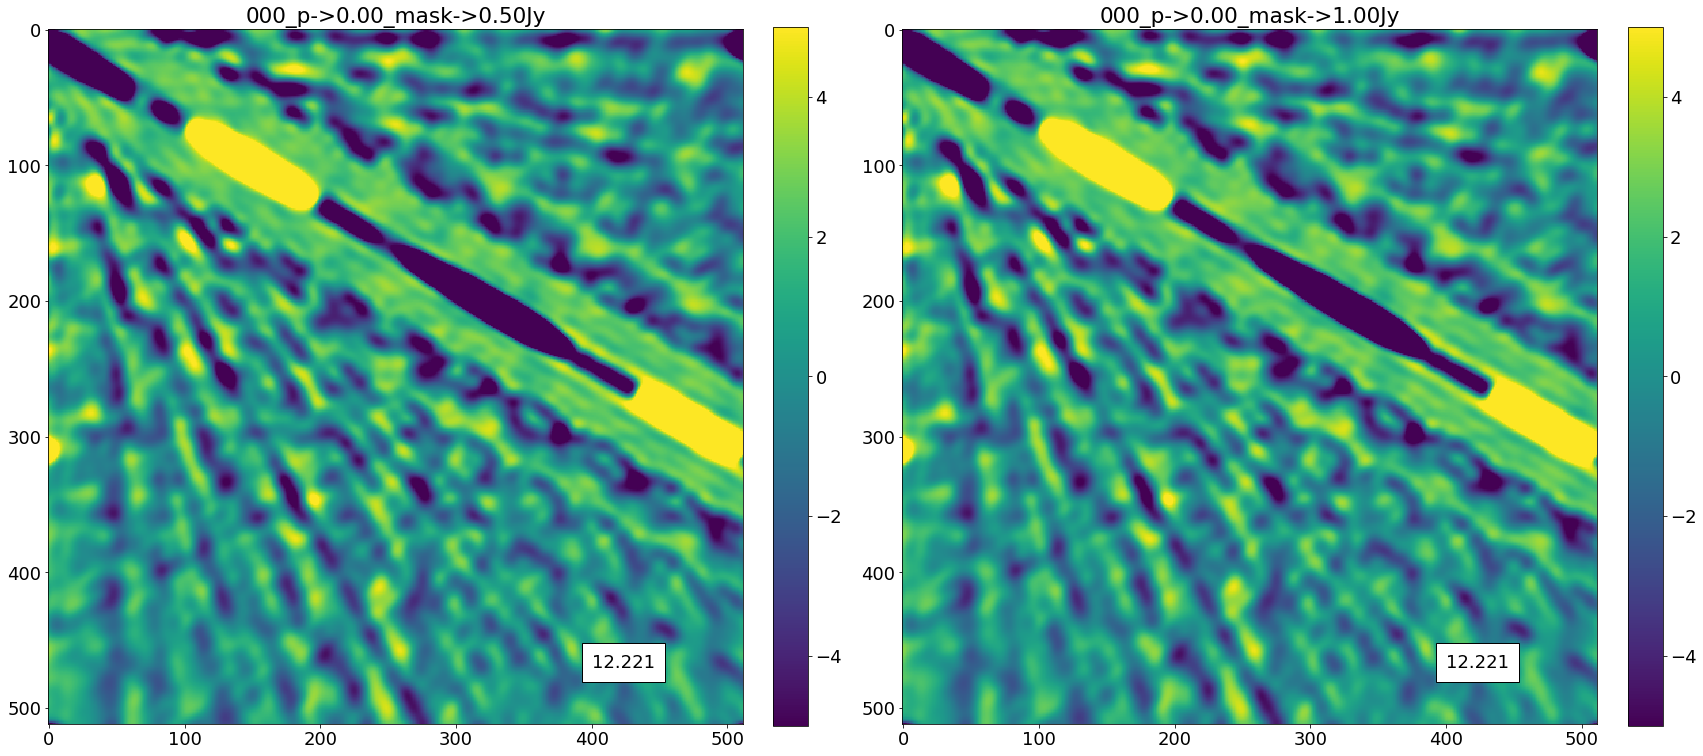

In [5]:
plot_all(fits_names=[image[4:6], image[8:10]], lim=[-5,5], rows=1, titles=titles,
        combine = lambda d: d[1] - d[0])
plt.tight_layout()

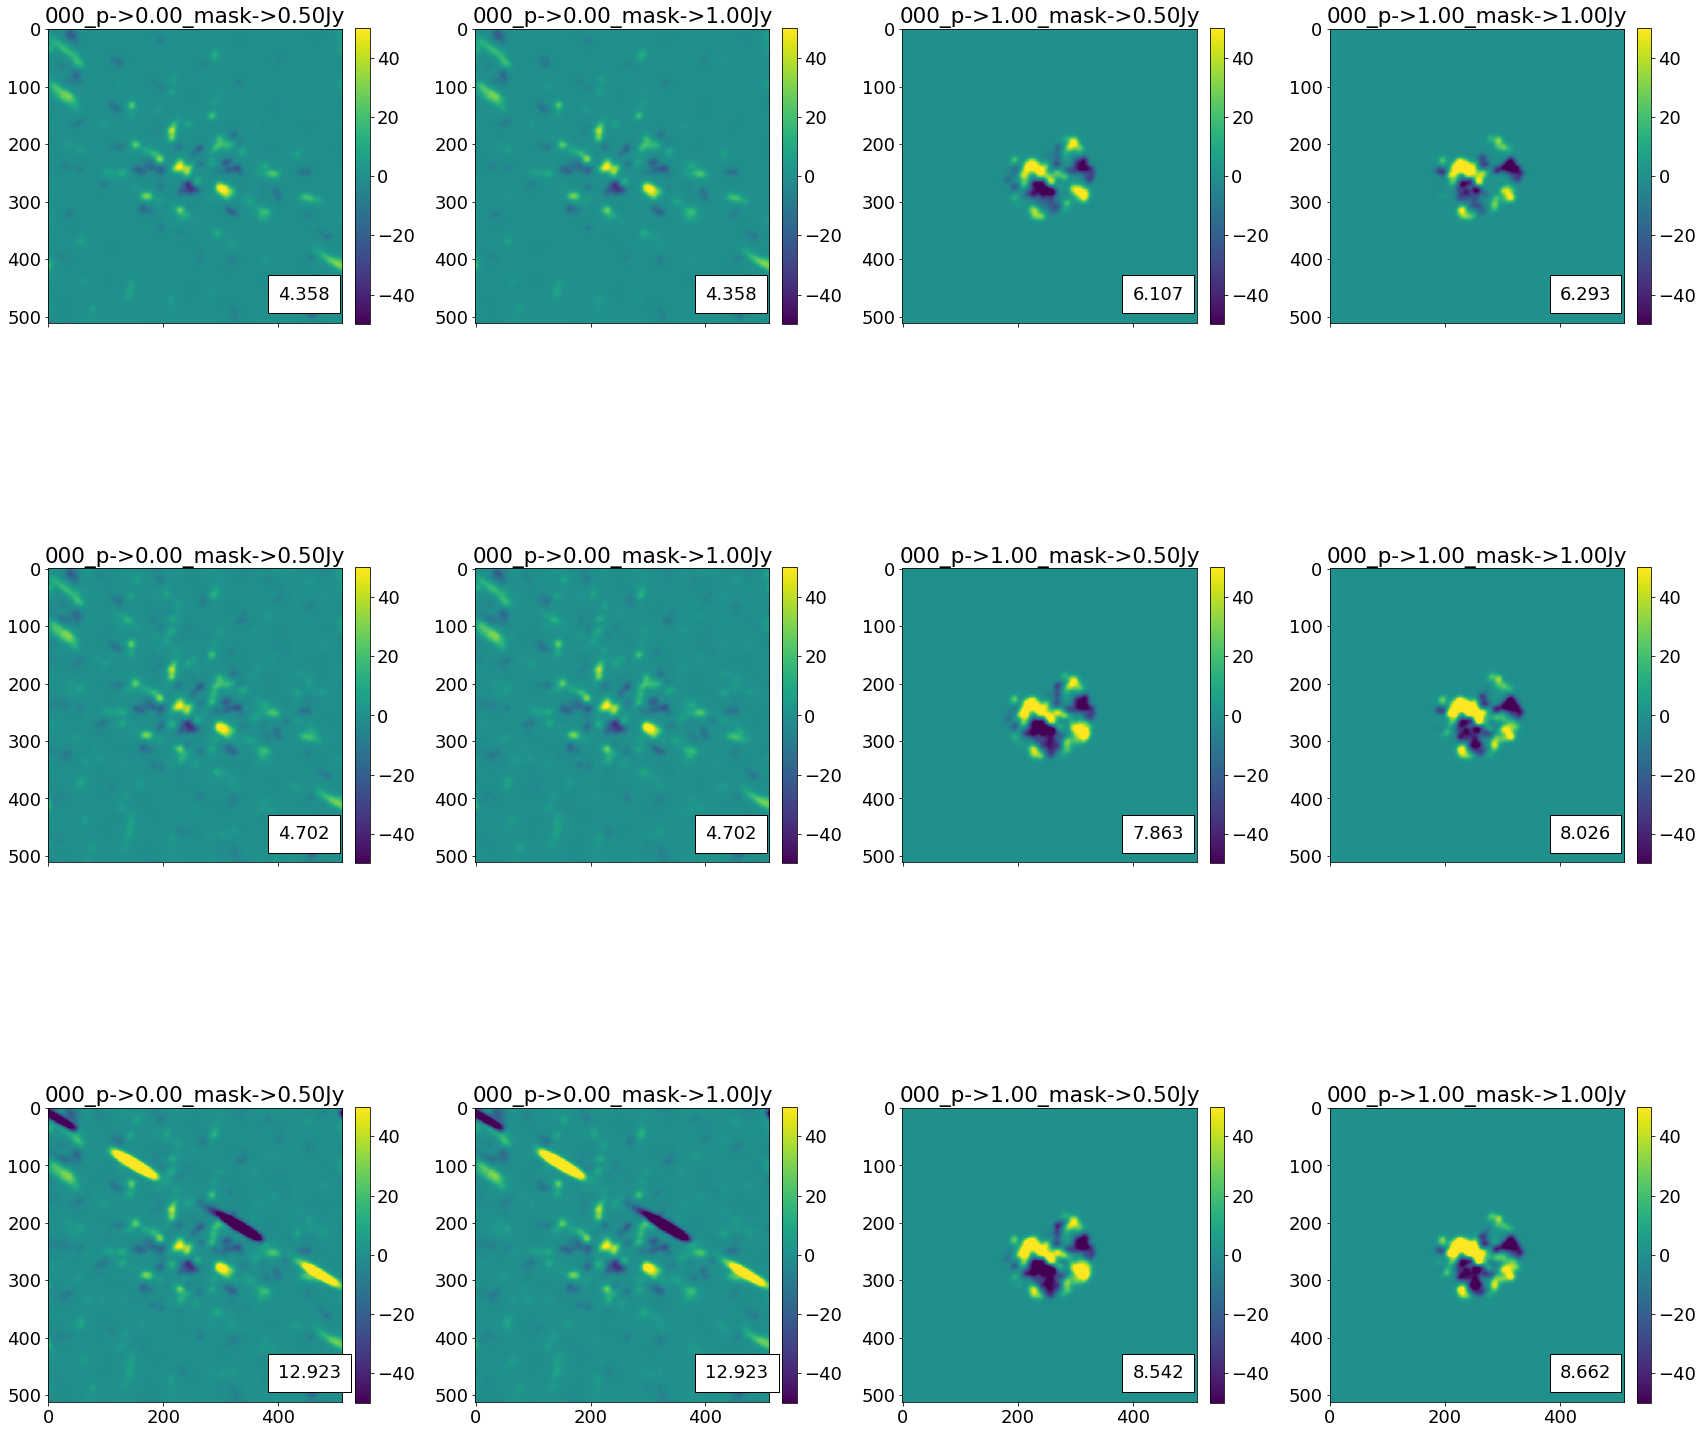

In [6]:
plot_all(fits_names=[image, residual], rows=3, titles=titles, lim=[-50,50],
         combine = lambda d : d[0] - d[1])
plt.tight_layout()

/lustre/aoc/projects/hera/aseidel/anaconda3/envs/hera/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


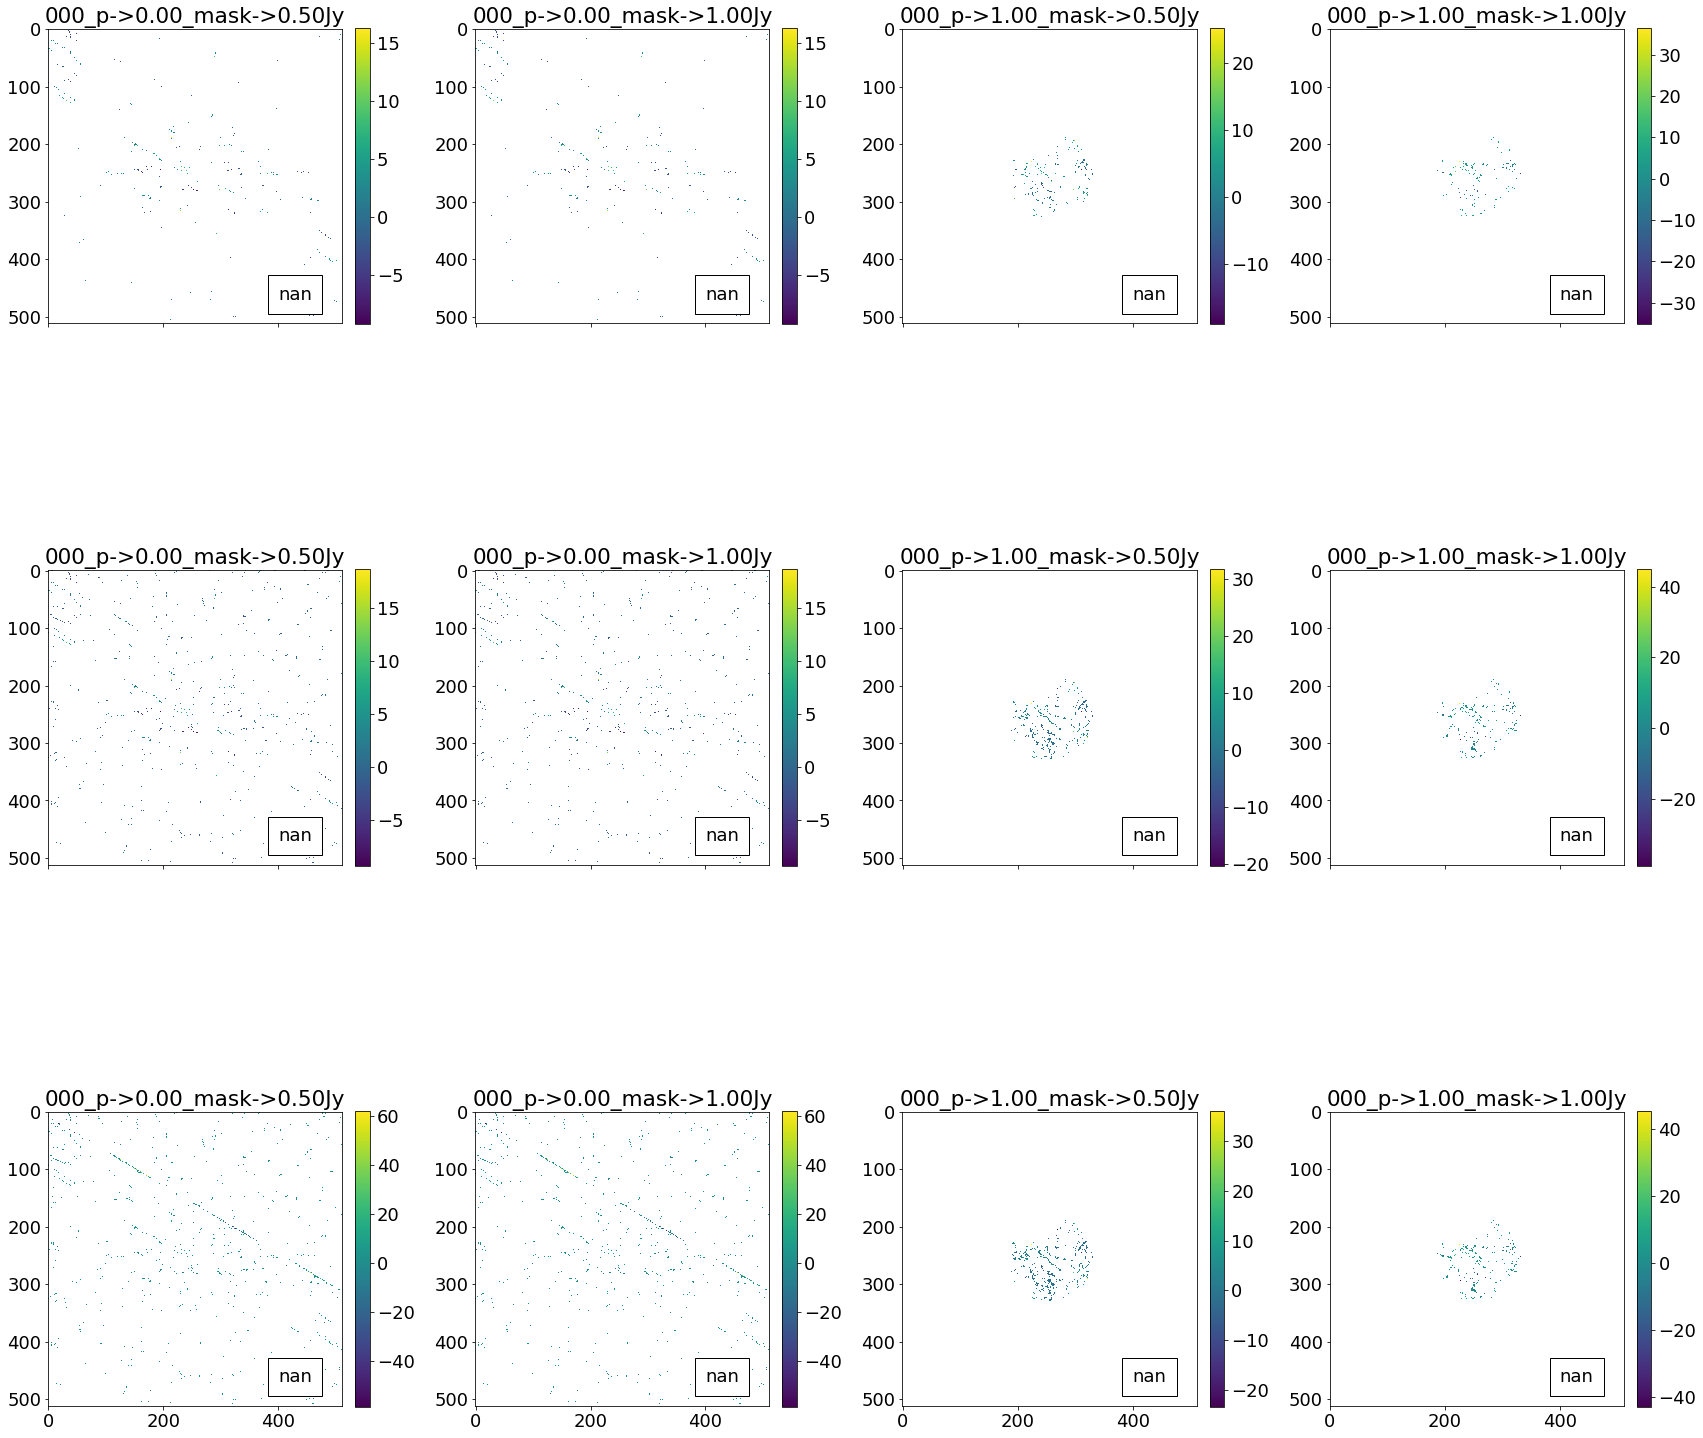

In [7]:
plot_all(fits_names=[model], rows=3, titles=titles, 
         combine = lambda d : d[0] / (d[0] != 0))
plt.tight_layout()

(<Figure size 1728x1728 with 4 Axes>,
 [array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f83b5da3990>,
        dtype=object)])

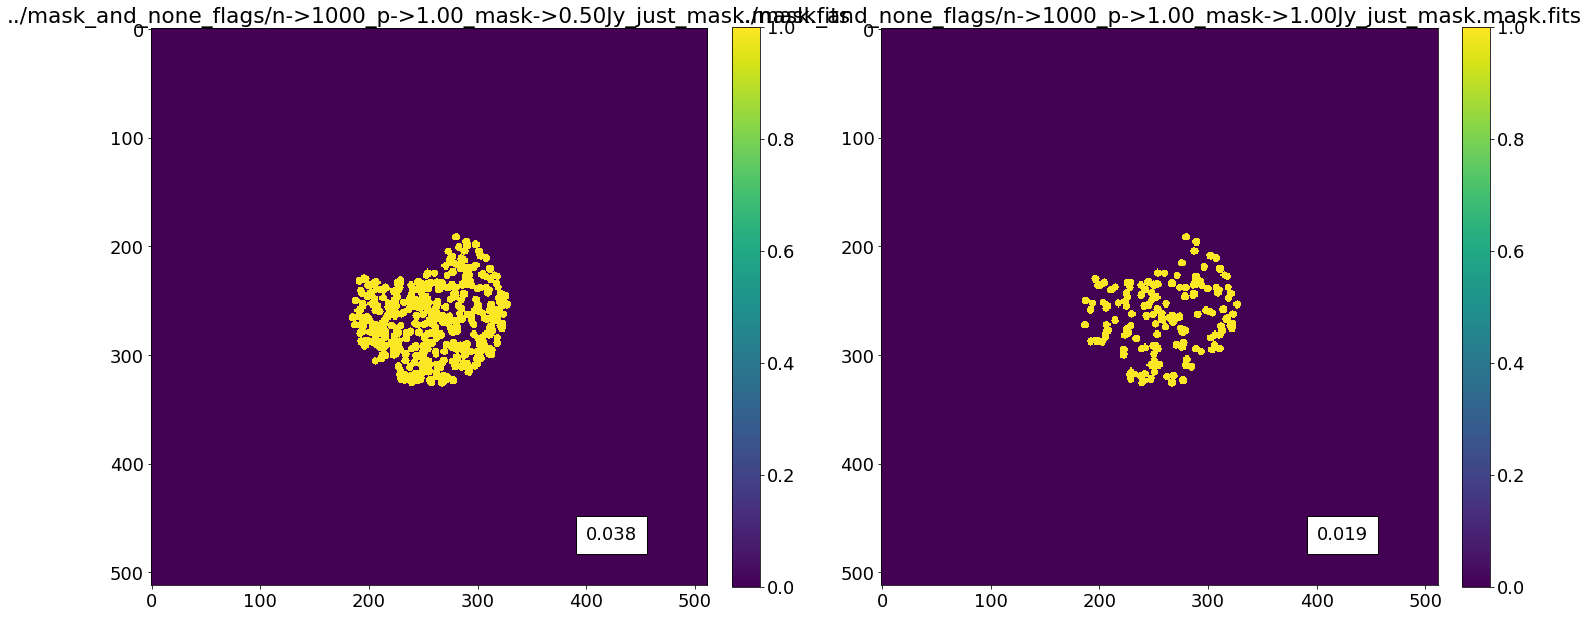

In [8]:
plot_all(sorted(glob.glob(path+"*mask.fits"))[0:2], rows=1, display_mean=True)

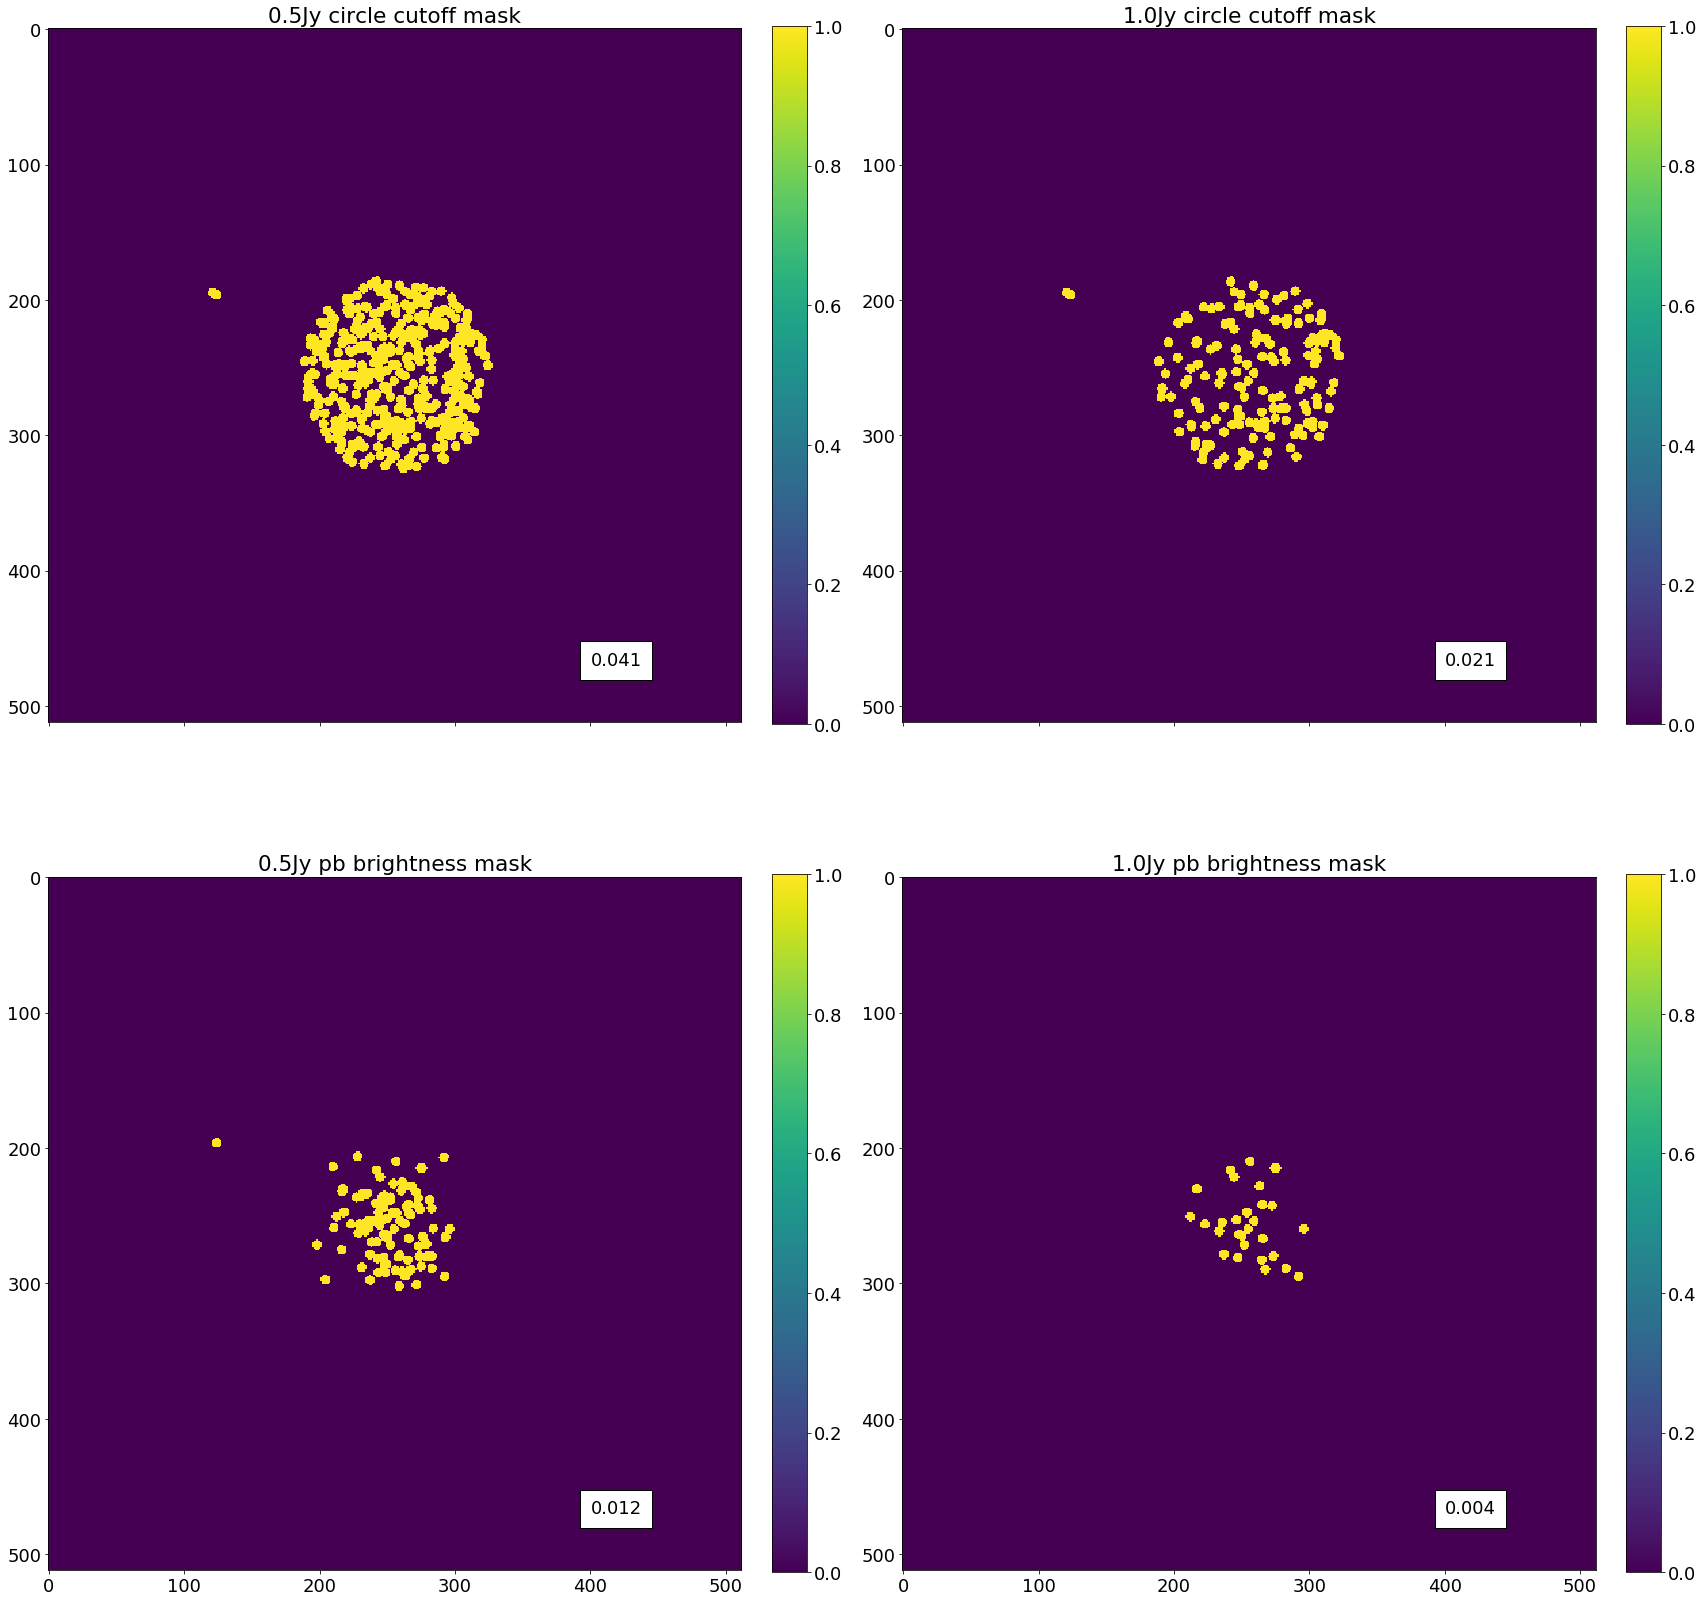

In [9]:
plot_all(sorted(glob.glob("*mask.fits"))[0:2] + sorted(glob.glob("new_mask_*Jy.fits")), 
         titles=["0.5Jy circle cutoff mask", "1.0Jy circle cutoff mask", "0.5Jy pb brightness mask", "1.0Jy pb brightness mask"],
        rows=2, display_mean=True)
plt.tight_layout()
plt.savefig('new_and_old_masks.png')